In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

# Load Data

with feature engineering

In [2]:
df = pd.read_csv('./train.csv')
test = pd.read_csv("./test.csv")

X = np.asmatrix(df.drop('label', axis=1)) / 255
y = np.asarray(df['label'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

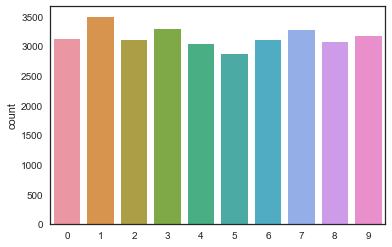

In [3]:
g = sns.countplot(y_train)

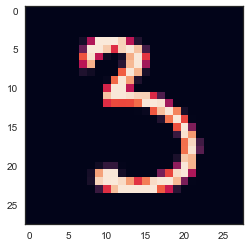

In [4]:
# plot some number
num = plt.imshow(X_train[1000,:].reshape(28,28))

In [5]:
class ANN():
    def __init__(self, nhid, nunits):
        self.nhid = nhid
        self.nunits = nunits # a list of number of units for each layer
        self.weights = []
        self.bias =  []
        self.result = [None]* (self.nhid+2)
        self.delta =  [None]* (self.nhid+2)
        self.zs = [None] * (self.nhid+2)
        self.errors = []
        self.accuracies = []
        
    
    def forward(self, x):
        '''
        The forward method is basically going through layer by layer, 
        and have sigmoid as activation function to generate the output
        for each layer
        
        Input:
            x: an input row vector
        Output:
            last layer result
        '''
        self.result[0] = np.array(x)
        for layer in range(1, self.nhid+2):
            z = self.result[layer-1]@self.weights[layer-1] + self.bias[layer-1]
            self.zs[layer] = np.array(z)
            result = self.sigmoid(z)
            self.result[layer] = np.array(result)
        return self.result[layer]
    
    def backward(self, x, y):
        '''
        The backward method is doing the back probagation method for each layer.
        To ease the weights updating, I saved the delta for each layer
        
        Input: 
            x: input row vector
            y: true result
        '''
        self.delta[self.nhid+1] = self.dsigmoid(self.zs[self.nhid+1]) * (y - self.result[self.nhid+1])
        for layer in range(self.nhid, 0, -1):
            z = self.zs[layer]
            self.delta[layer] = (self.delta[layer+1]@self.weights[layer].T) * self.dsigmoid(z)
                
                
    def weights_update(self, alpha):
        '''
        This function basically update the parameters(not only weights) for each layer
        based on the delta saved from the back probagation method
        
        Input:
            alpha: learning rate
        '''
        for layer in range(self.nhid+1):
            self.weights[layer] += alpha * self.result[layer].T@self.delta[layer+1]
            self.bias[layer] += alpha * self.delta[layer+1]
    
    def fit(self, X, y, alpha, t):
        '''
        Fitting the neural network and calculate errors and accuracy for each epoch
        
        Input:
            X: training features
            y: training result 
            alpha: learning rate
            t: number of iterations(epoch)
        
        '''
        y = np.asarray(pd.get_dummies(y), dtype=float)
        m, n = X.shape
        self.param_init(X,y)
        for epoch in range(t):
            error =0
            for i in range(m):
                x = np.asarray(X[i,:])
                v = np.asarray(y[i,:]).reshape((1, len(y[i,:])))
                
                a = self.forward(x)
                self.backward(x, v)
                self.weights_update(alpha)
                error += np.sum((v-a)**2)
            print(f'Training Error: {error/len(X)}')
            accuracy = self.accuracy(X, y)  
            self.accuracies.append(accuracy)
            self.errors.append(error/len(X))
            if epoch%5 ==0:
                print('>epoch=%d, lr=%0.3f, error=%.3f, accuracy=%.4f'%(epoch, alpha, error/len(X), accuracy))
                
            
    def predict(self, T):
        '''
        Input:
            T: test examples
            
        Output:
            predict result
        '''
        result = T
        for layer in range(1, self.nhid+2):
            z = result@self.weights[layer-1]
            result = self.sigmoid(z)
        return result, np.argmax(result, axis=1)
        
    def print(self):
        print(f'current weights: \n {self.weights}' \
             f'current bias: \n {self.bias}')
    
    def param_init(self, X, y):
        '''
        Initialing parameters for neural network by using xavier initialization
        
        Input:
            X: training features
            y: training result
        '''
        nin, nout = X.shape[1], self.nunits[0]
        self.weights.append(self.xavier_init(nin, nout))
        self.bias.append(self.xavier_init(1, nout))
        for i in range(self.nhid - 1):
            self.weights.append(self.xavier_init(self.nunits[i], self.nunits[i+1]))
            self.bias.append(self.xavier_init(1, self.nunits[i+1]))
        self.weights.append(self.xavier_init(self.nunits[-1], y.shape[1]))
        self.bias.append(self.xavier_init(1, y.shape[1]))
        
    def xavier_init(self, nin, nout):
        '''
        Input:
            nin: number of input
            nout: number of output
        Output:
            xavier initialization
        '''
        up = np.sqrt(6 / (nin + nout))
        low = -up
        return (up - low) * np.random.random_sample((nin, nout)) + low
    
    def accuracy(self, X, y):
        '''
        Input:
            X: training features
            y: training result
        Output:
            accuracy
            
        '''
        prob, predictions = self.predict(X)
        predictions = np.squeeze(np.asarray(predictions))
        label = np.argmax(y, axis=1)
        return sum(predictions == label) / X.shape[0]
                
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def dsigmoid(self, x):
        '''
        derivatives for sigmoid
        '''
        return self.sigmoid(x) * (1 - self.sigmoid(x))

In [6]:
ann = ANN(2, [64, 64])

In [7]:
%%time
ALPHA = 0.1
EPOCH = 20
ann.fit(X_train, y_train, ALPHA, EPOCH)

Training Error: 0.305111104410624
>epoch=0, lr=0.100, error=0.305, accuracy=0.9159
Training Error: 0.11553265572269808
Training Error: 0.08597945220389482
Training Error: 0.06923299499781688
Training Error: 0.05804369756110391
Training Error: 0.04971688542357365
>epoch=5, lr=0.100, error=0.050, accuracy=0.9727
Training Error: 0.04316807849710413
Training Error: 0.03792529986282915
Training Error: 0.033453521099773405
Training Error: 0.02957115827923241
Training Error: 0.026376685771993025
>epoch=10, lr=0.100, error=0.026, accuracy=0.9846
Training Error: 0.023722349178411532
Training Error: 0.02143442066478345
Training Error: 0.019500904765450598
Training Error: 0.01789154038737929
Training Error: 0.016455202489956695
>epoch=15, lr=0.100, error=0.016, accuracy=0.9854
Training Error: 0.015221036176883038
Training Error: 0.014259407447295421
Training Error: 0.013333599632849448
Training Error: 0.012566579491967657
CPU times: user 6min 13s, sys: 44.2 s, total: 6min 57s
Wall time: 4min 17s


In [8]:
prob, res = ann.predict(X_val)
res = res.reshape(1,-1)
y = y_val.reshape(1,-1)
np.sum(res == y) / len(y_val)

0.9598095238095238

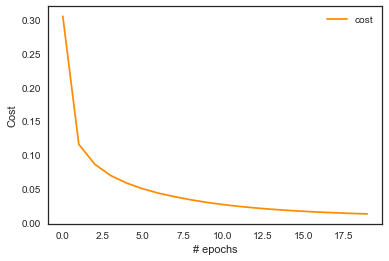

In [9]:
# plot the Training cost and Validation cost
epoches = np.arange(EPOCH)
plt.plot(epoches, ann.errors, color='darkorange', label="cost")
plt.xlabel('# epochs')
plt.ylabel('Cost')
legend = plt.legend(loc='best', shadow=True)

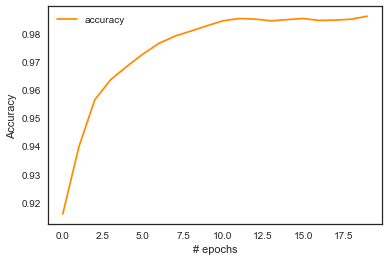

In [10]:
# plot the Training accuracy and Validation accuracy
plt.plot(epoches, ann.accuracies, color='darkorange', label="accuracy")
plt.xlabel('# epochs')
plt.ylabel('Accuracy')
legend = plt.legend(loc='best', shadow=True)

# Confusion Matrix

Confusion matrix can be very helpfull to see your model drawbacks.

I plot the confusion matrix of the validation results.

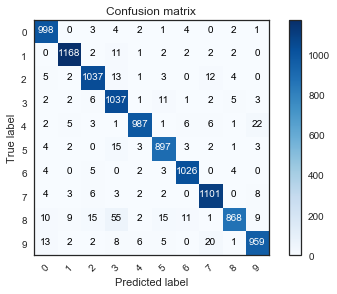

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
prob, Y_pred = ann.predict(X_val)
Y_pred = np.squeeze(np.asarray(Y_pred))
Y_true = y_val

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

# Display Error Result

Let's investigate for errors.

I want to see the most important errors . For that purpose i need to get the difference between the probabilities of real value and the predicted ones in the results.

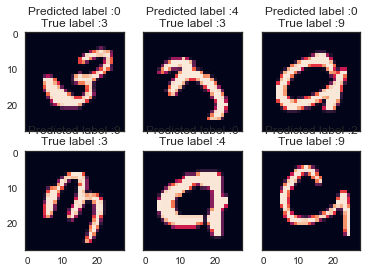

In [14]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred - Y_true != 0)
errors = np.squeeze(np.asarray(errors))
Y_pred_errors = Y_pred[errors]
Y_pred_prob_errors = prob[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_prob_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_errors, Y_true_errors)